In [1]:
from functools import partial

import matplotlib.pyplot as plt

from superfv import EulerSolver, plot_1d_slice, plot_timeseries
from superfv.initial_conditions import entropy_wave

In [2]:
gamma = 5 / 3

In [3]:
configs = {
    "ZS3-FR2-nolazy": dict(
        riemann_solver="hllc",
        p=3,
        ZS=True,
        flux_recipe=2,
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
    "ZS3-FR2-fulllazy": dict(
        riemann_solver="hllc",
        p=3,
        ZS=True,
        flux_recipe=2,
        lazy_primitives="full",
        PAD={"rho": (0, None), "P": (0, None)},
        SED=True,
    ),
}

In [4]:
N = 128

sims = {}
for name, config in configs.items():
    # print status
    print(f"Running N={N}, config={name}")

    # run solver
    sim = EulerSolver(
        ic=partial(entropy_wave, gamma=gamma), nx=N, gamma=gamma, **config
    )
    try:
        sim.run(n=1, reduce_CFL=True, muscl_hancock=config.get("MUSCL", False))
        sims[name] = sim
    except RuntimeError as e:
        print(f"  Failed: {e}")
        continue

Running N=128, config=ZS3-FR2-nolazy
Step #1 @ t=3.12e-03 | dt=3.12e-03 | min(rho)=1.00e+00, min(P)=6.00e-01 | (ran in 0.04s)            
Running N=128, config=ZS3-FR2-fulllazy
Step #1 @ t=3.12e-03 | dt=3.12e-03 | min(rho)=1.00e+00, min(P)=6.00e-01 | (ran in 0.01s)            


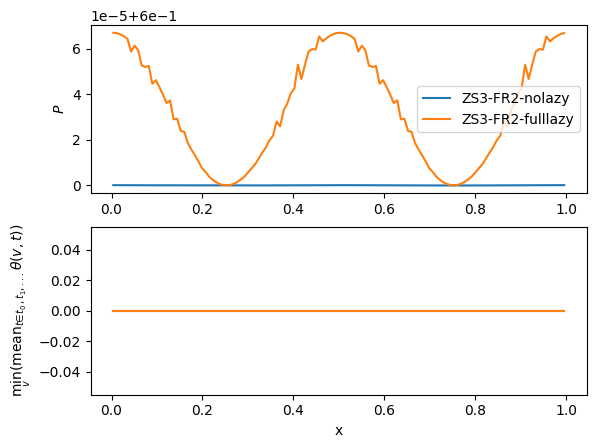

In [5]:
fig, axs = plt.subplots(2, 1)
axs[0].set_ylabel(r"$P$")
axs[1].set_ylabel(r"$ \min_v{ (\text{mean}_{t \in t_0, t_1, ...}{ \theta(v, t) }) } $")
axs[1].set_xlabel("x")

for name, sim in sims.items():
    plot_1d_slice(sim, axs[0], "P", cell_averaged=True, label=name)
    plot_1d_slice(sim, axs[1], "min", theta=True, visualization=False, label=name)

axs[0].legend()

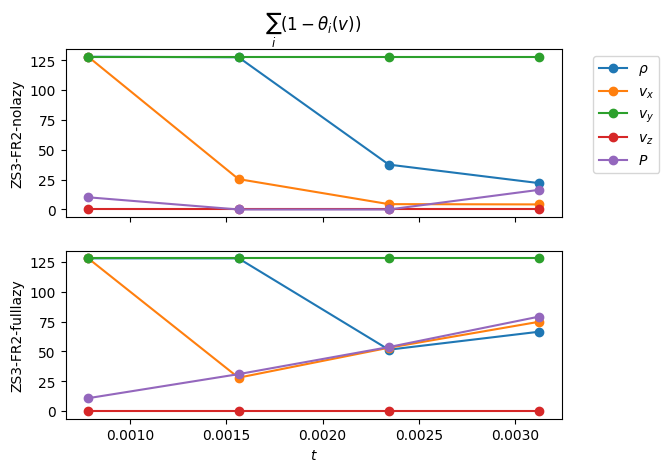

In [6]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].set_title(r"$\sum_i ( 1-\theta_i(v) )$")
axs[1].set_xlabel(r"$t$")

style = dict(one_minus_theta=True, visualization=False, marker="o")
for i, (name, sim) in enumerate(sims.items()):
    axs[i].set_ylabel(name)

    plot_timeseries(sim, axs[i], "rho", label=r"$\rho$", **style)
    plot_timeseries(sim, axs[i], "vx", label=r"$v_x$", **style)
    plot_timeseries(sim, axs[i], "vy", label=r"$v_y$", **style)
    plot_timeseries(sim, axs[i], "vz", label=r"$v_z$", **style)
    plot_timeseries(sim, axs[i], "P", label=r"$P$", **style)

axs[0].legend(bbox_to_anchor=(1.05, 1))